In [126]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import gc
gc.collect()

8349

Problem 1

In [127]:
def minimum(arr):
    out=np.inf
    for i in (arr):
        for j in (i):
            if(j<out):
                out=j
    return out
# Create duplicate function that is run faster (runs pixels in parallel) on np array
# minimum = np.frompyfunc(minimum, 1, 1)
def dist(img):
    # Make array with same size (minus outer frame pixels), but with all elements = infinity
    length,width=img.shape
    distance=np.full((length,width), np.inf)
    # setting object pixels to 0
    distance[img==255]=0
    # Offset distance to add
    cityBlock=np.array([[2,1,2],[1,0,1],[2,1,2]])
    #First Iteration L to R,U to D
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            # Getting the minimum of the square
            distances=distance[i-1:i+2,j-1:j+2]+cityBlock
            # distances=distance[np.ix_([i-1:i+2,j-1:j+2])]+cityBlock
            distance[i,j]=minimum(distances)
    firstPass=np.copy(distance)

    
    #Second Iteration
    for i in range(img.shape[0]-2,0,-1):
        for j in range(img.shape[1]-2,0,-1):
            # Getting the minimum of the square
            distances=distance[i-1:i+2,j-1:j+2]+cityBlock
            distance[i,j]=minimum(distances)
    return firstPass[1:-2,1:-2],distance[1:-2,1:-2]



Dolphin

In [128]:
img=np.asarray(Image.open('Dolphin.bmp').convert("L"))
# plt.imshow(img, cmap="gray")
dolphin1,dolphin2=dist(img)

First Iteration

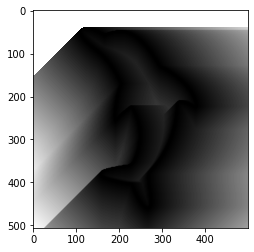

In [129]:
plt.imshow(dolphin1, cmap="gray")

Second Iteration

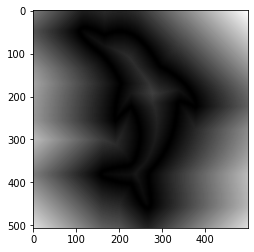

In [130]:
plt.imshow(dolphin2, cmap="gray")

Stars

In [131]:
img=np.asarray(Image.open('Stars.bmp').convert("L"))
# plt.imshow(img, cmap="gray")
stars1,stars2=dist(img)

First Iteration

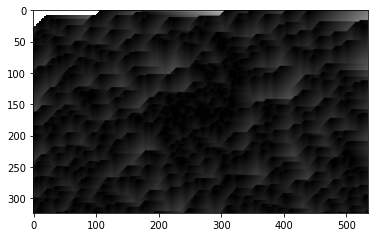

In [132]:
plt.imshow(stars1, cmap="gray")

Second Iteration

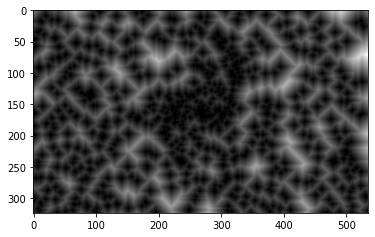

In [137]:
plt.imshow(stars2, cmap="gray")
# Note that the output image does not have the same brightness as this cmap, because the highest value in this image is 51, not 255

Problem 2

In [134]:
def Mean(x):
  sum=0
  for i in x:
    for j in i:
      sum+=j
  return sum/np.size(x)
def average(img):
  out=np.zeros_like(img)
  for i in range(0,img.shape[0],2):
        for j in range(0,img.shape[1],2):
          out[i:i+2,j:j+2]+=np.uint8(Mean(img[i:i+2,j:j+2]))
  return out

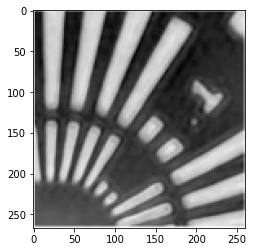

In [135]:
img=np.asarray(Image.open('grayscaleImage.bmp').convert("L"))
spatial=average(img)
plt.imshow(spatial, cmap="gray")

In [136]:
images=[dolphin1,dolphin2,stars1,stars2,spatial]
names=["dolphin1","dolphin2","stars1","stars2","spatial"]
for i in range(len(images)):
  im=images[i]
  im[im>255]=255
  new_image = Image.fromarray(np.uint8(im),'L')
  new_image.save(names[i]+".bmp")